In [ ]:
!nvidia-smi

Tue Apr 18 11:04:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Just testing the pretrained model
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:01<00:00, 5.52MB/s]

2023-04-18 11:04:53.880016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 11:04:54.698306: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 23.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 59.4ms
Speed: 0.6ms pre-process, 59.4ms inference, 343.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


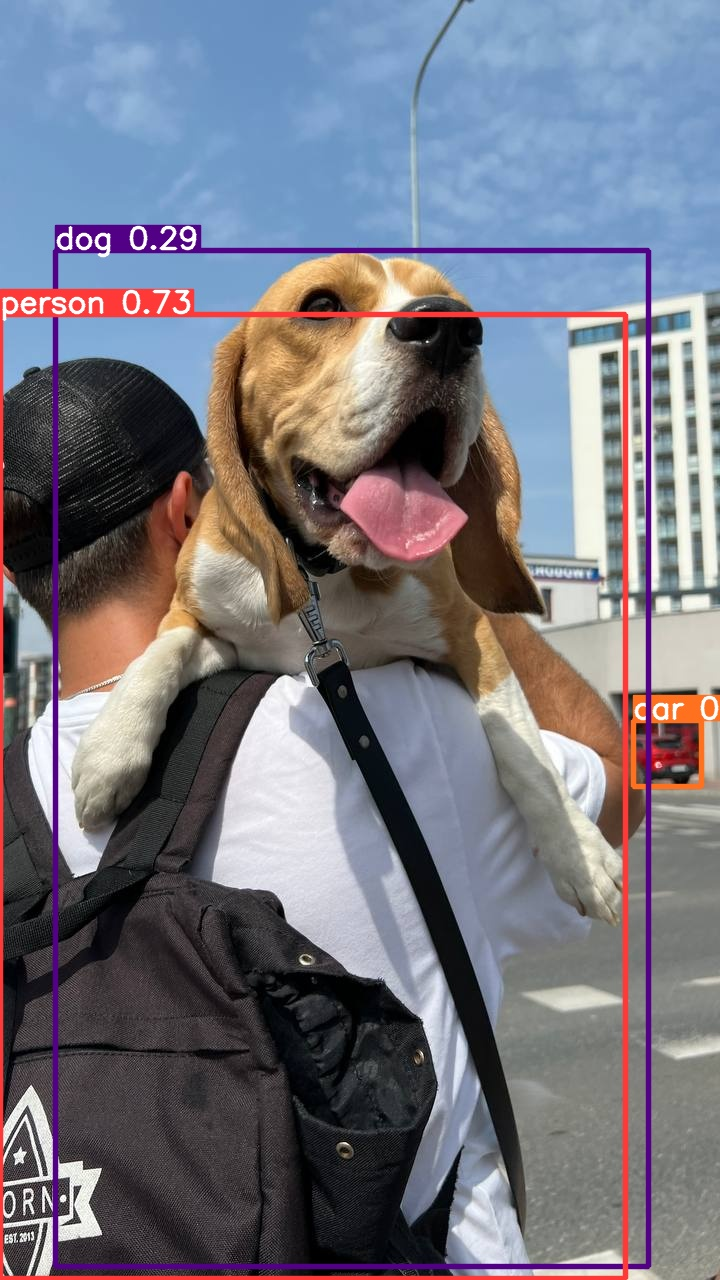

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [7]:
# Downloading dataset

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="SCdzbsMzhNfvVpjDp0mB")
project = rf.workspace("licenceplate-pfqqh").project("licence-plate-detection-kip63")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to licence-plate-detection-1 in yolov8:: 100%|██████████| 1064/1064 [00:00<00:00, 2249.25it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 15.7MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/licence-plate-detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1081.jpg
confusion_matrix.png				    train_batch1082.jpg
events.out.tfevents.1681816293.4645de5b5c89.7114.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1080.jpg				    weights


/content


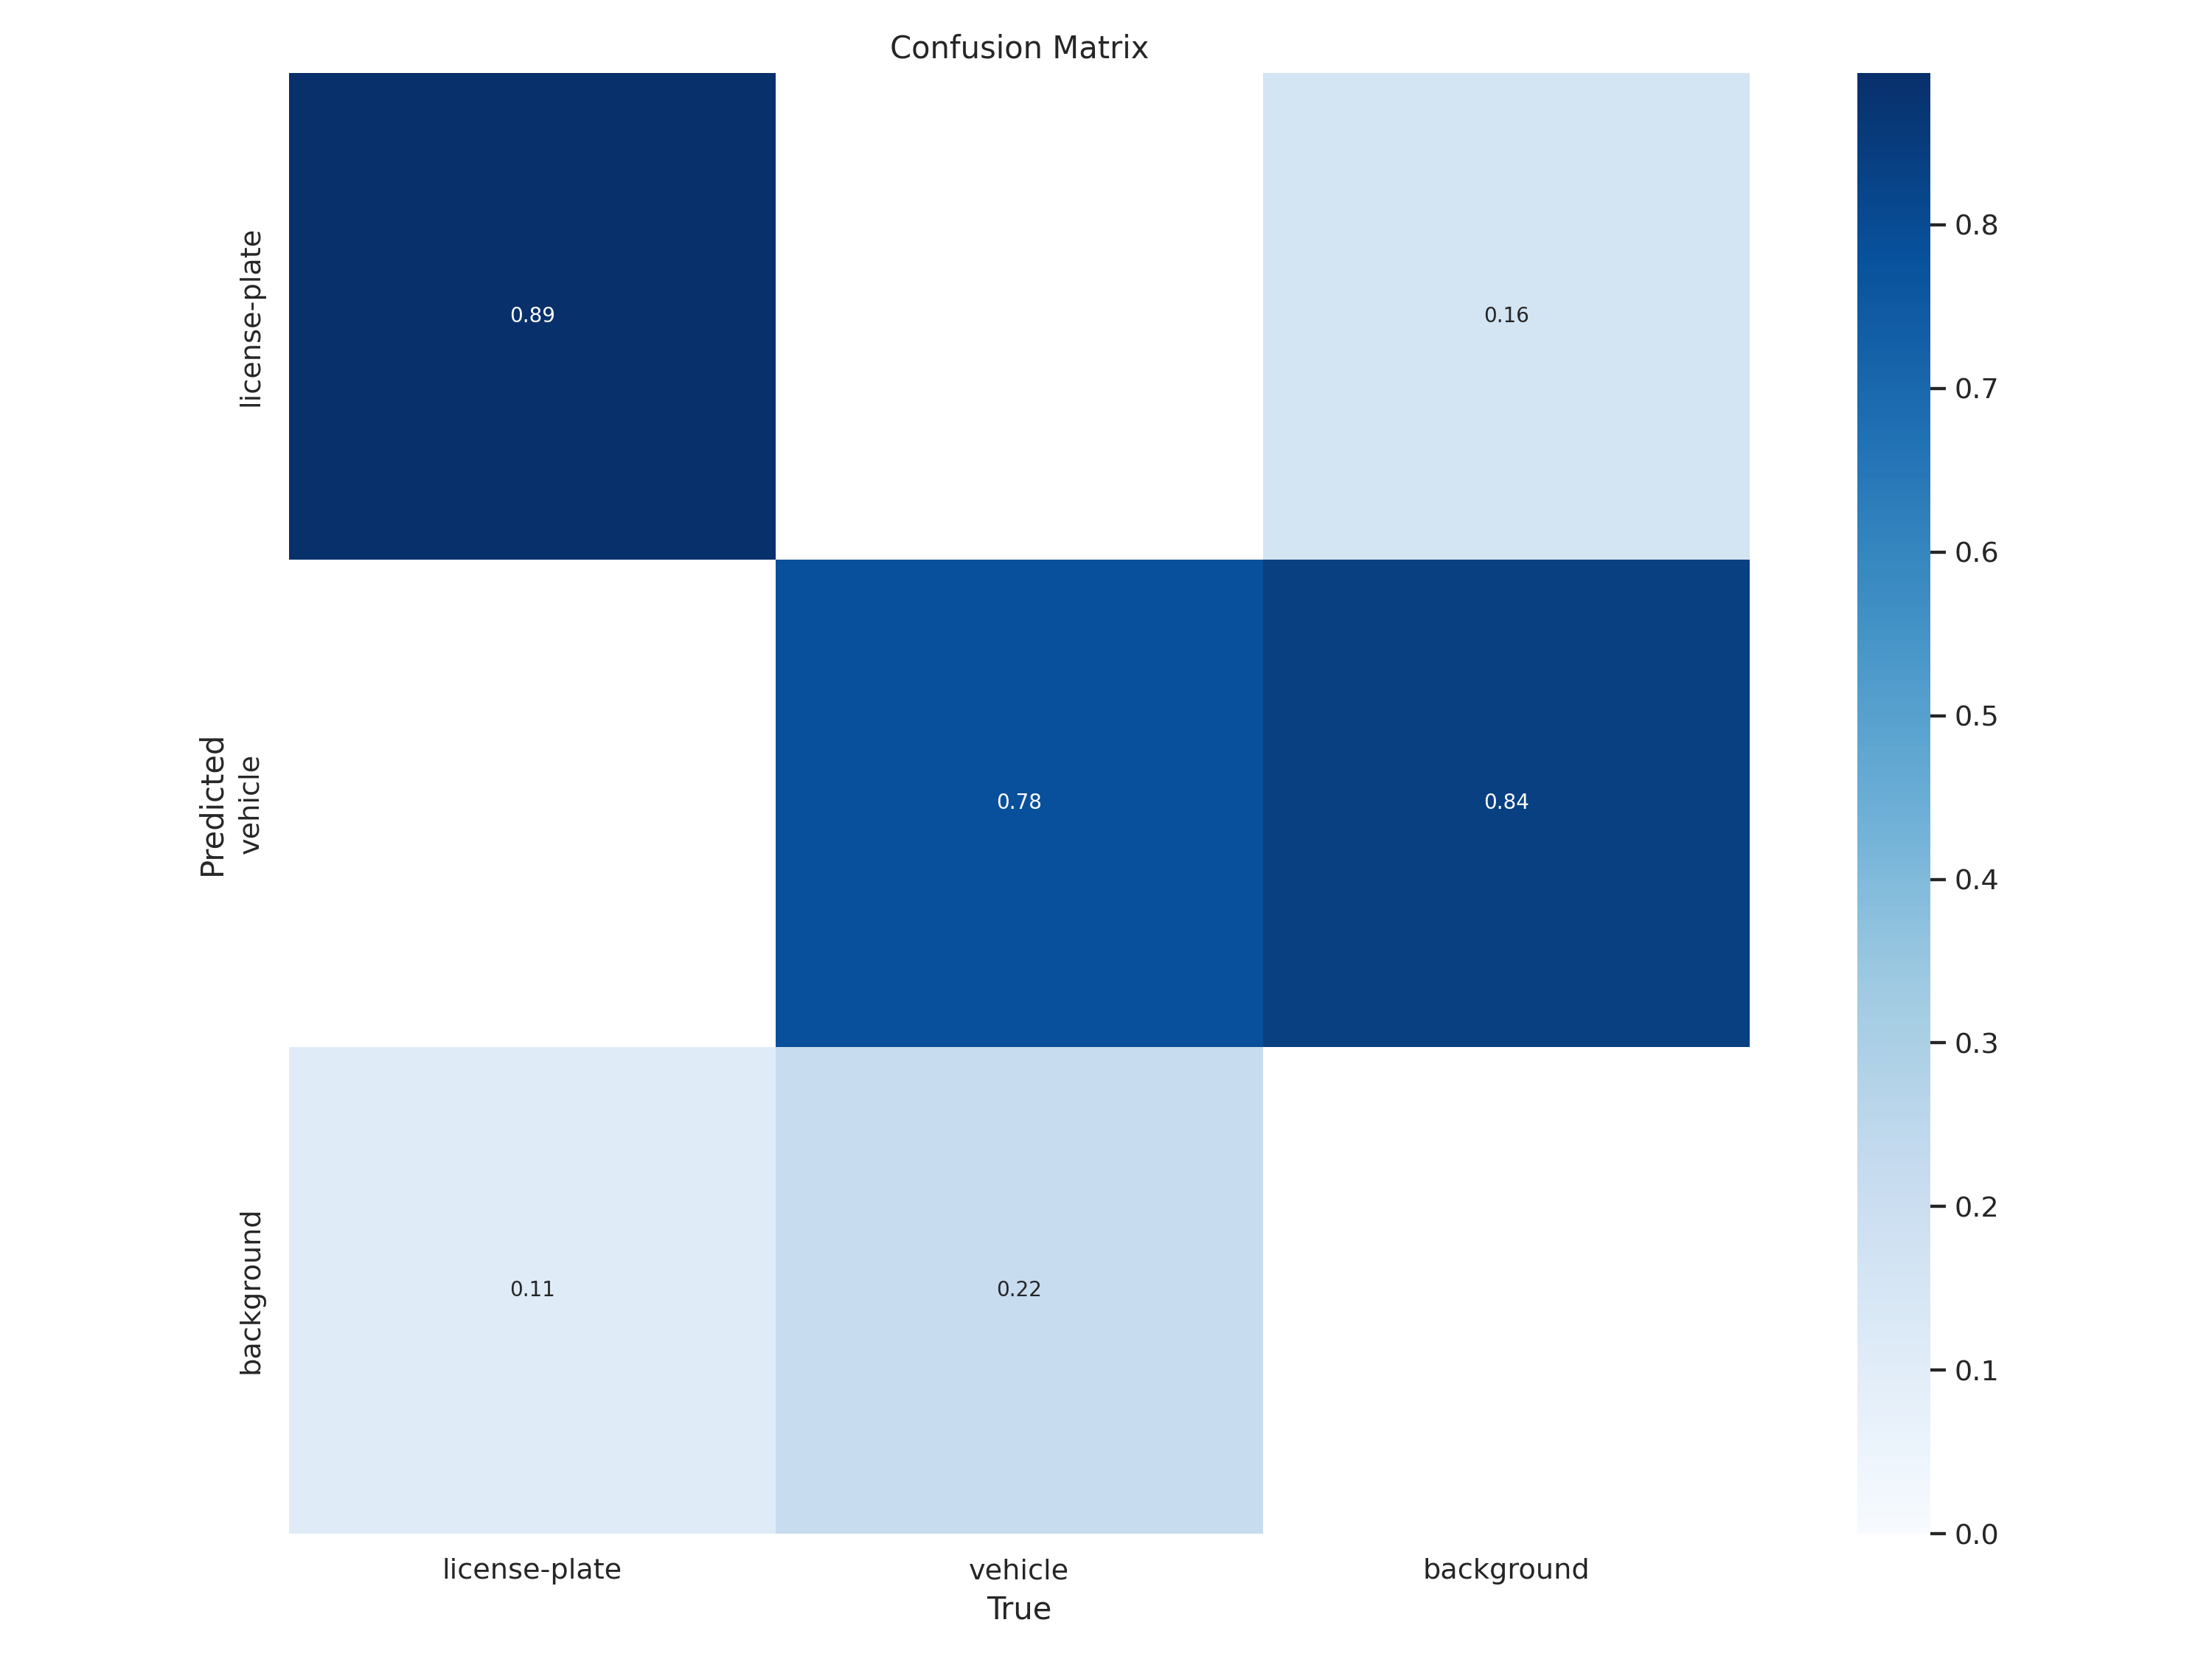

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


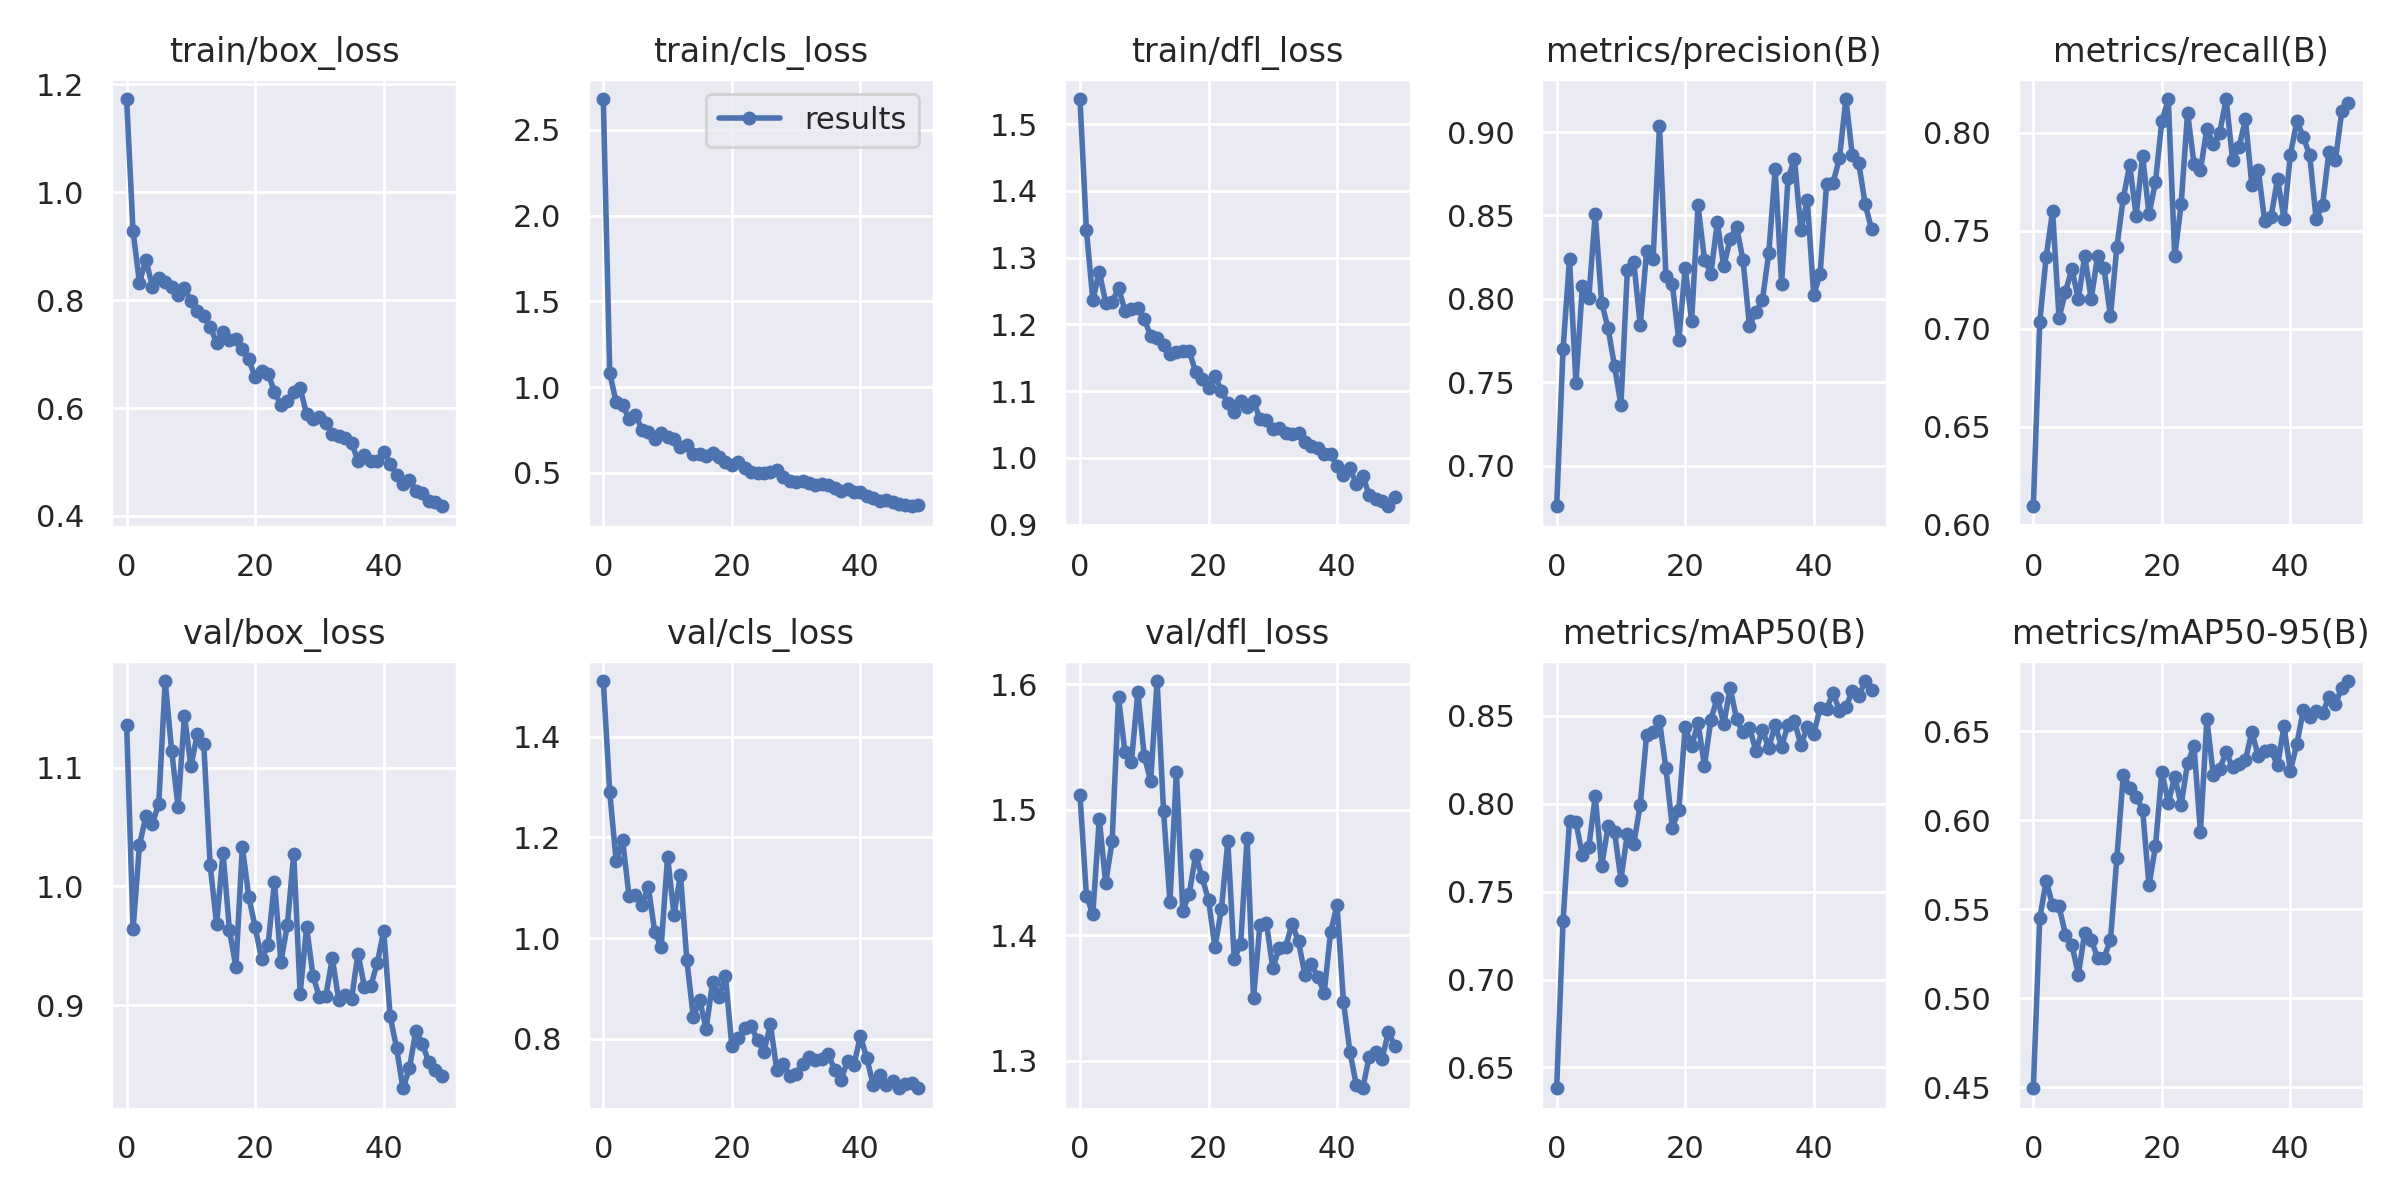

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


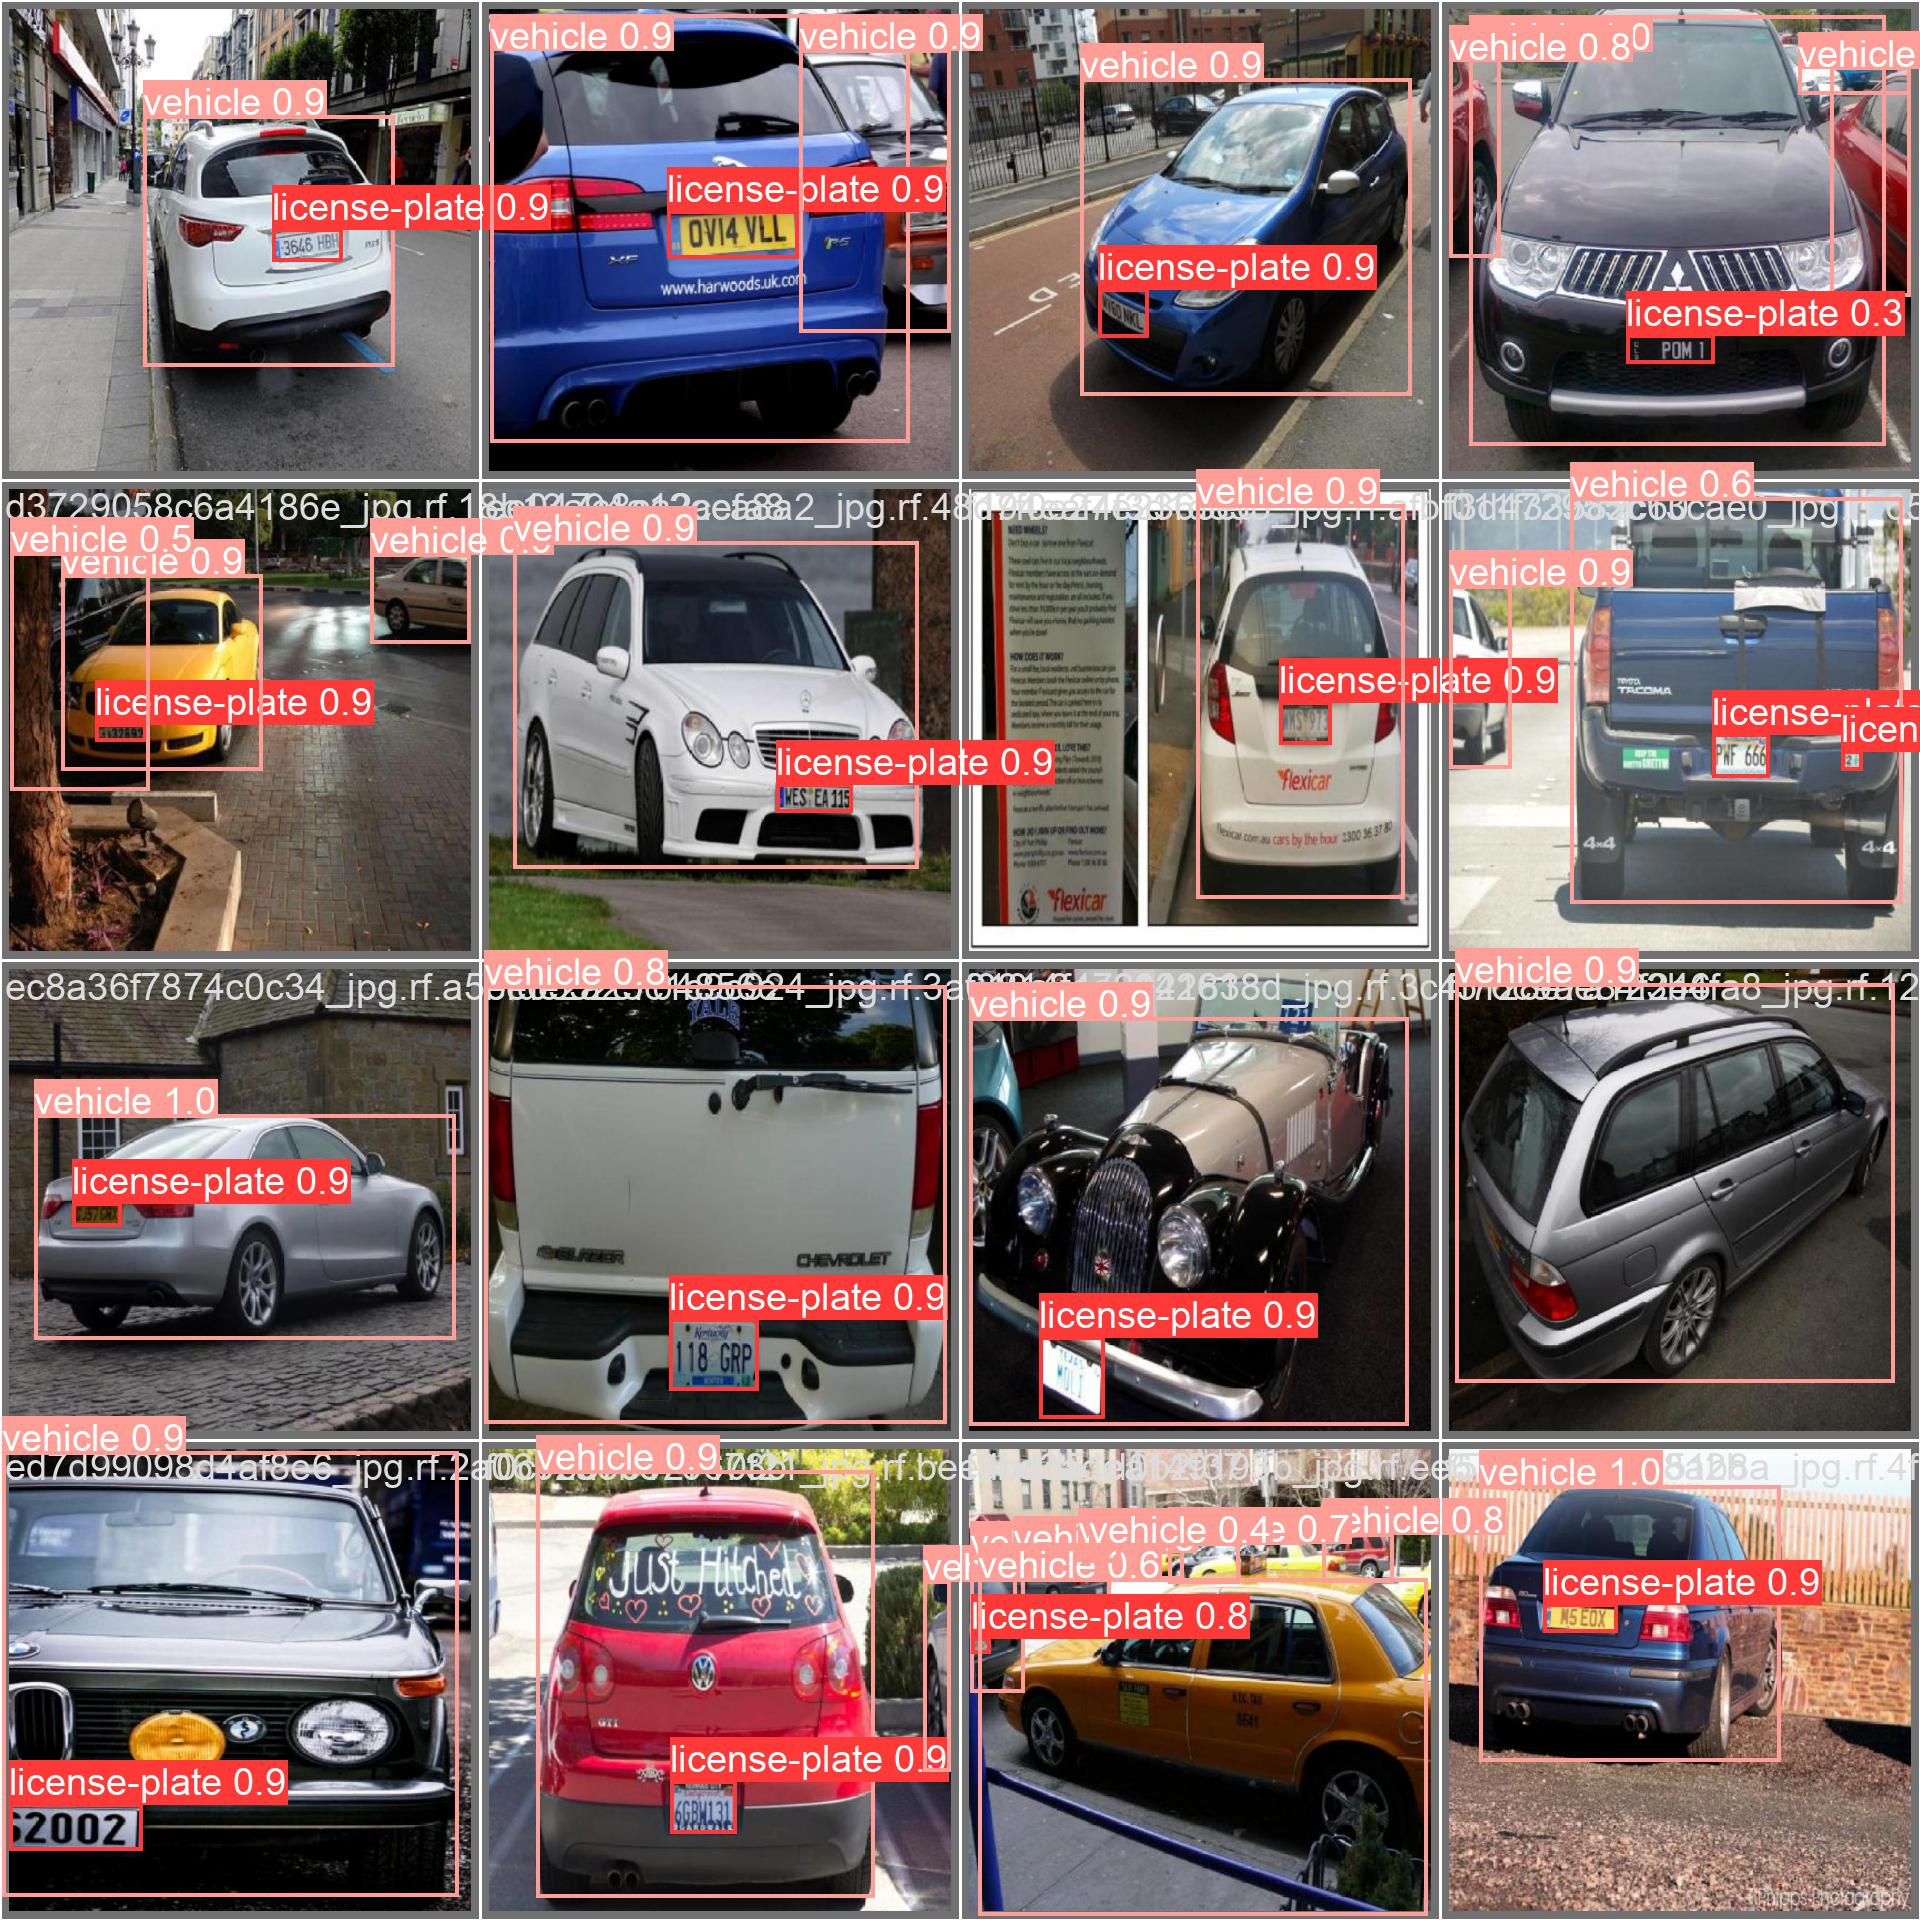

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-18 11:33:56.209936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 11:33:57.073772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/licence-plate-detection-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.06s/it]
                   all         70        218      0.842      0.815      0.865      0.678
         license-plate

In [56]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
2023-04-18 12:20:38.703692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 12:20:39.580926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/35 /content/datasets/licence-plate-detection-1/test/images/b15d6c0bdf90226d_jpg.rf.39bf3db904a23ab1bd0e06043d314aa7.jpg: 800x800 1 license-plate, 1 vehicle, 24.6ms
image 2/35 /content/datasets/licence-plate-detection-1/test/images/b193070a9c45b5ab_jpg.rf.3adbc57abe6ec44ea0f9f55c28f2f999.jpg: 800x800 2 license-plates, 2 vehicles, 24.6ms
image 3/35 /content/datasets/licen

In [60]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/videos save=True

/content
2023-04-18 12:43:51.979146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 12:43:52.830343: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/136) /content/datasets/licence-plate-detection-1/test/videos/vid1.mp4: 480x800 4 license-plates, 4 vehicles, 67.0ms
video 1/1 (2/136) /content/datasets/licence-plate-detection-1/test/videos/vid1.mp4: 480x800 4 license-plates, 4 vehicles, 15.4ms
video 1/1 (3/136) /content/datasets/licence-plate-detection-1/test/videos/vid1.mp4: 480x800 5 license-plates, 4 vehicles, 

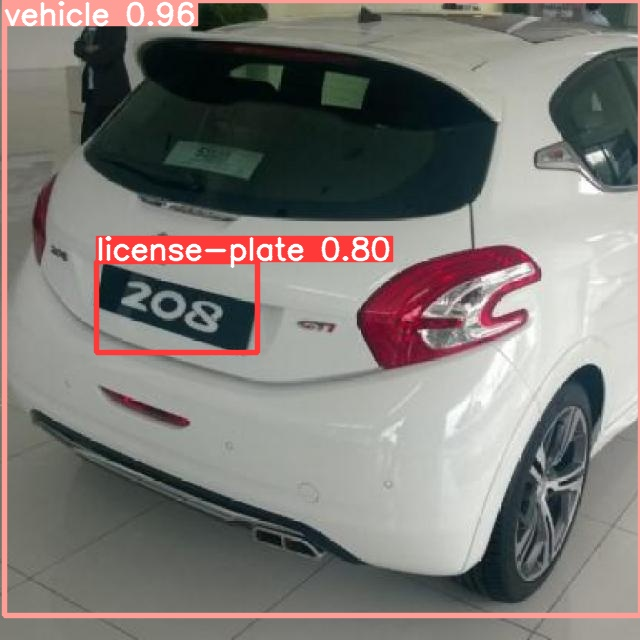

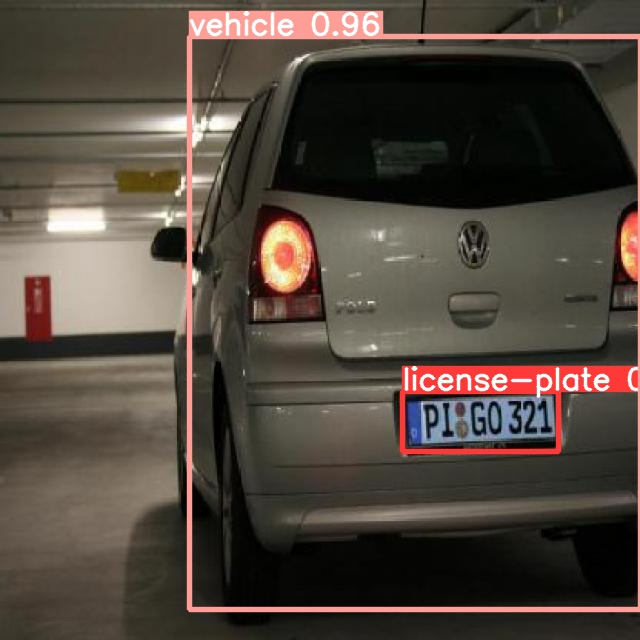

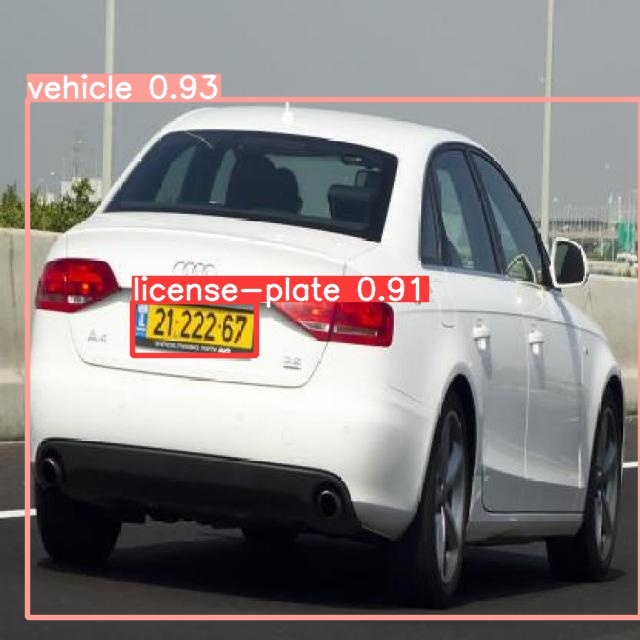

In [57]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[2:5]:
      display(Image(filename=image_path, width=600))
      print("\n")
      

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [64]:
#loading the model that we just built
model = project.version(dataset.version).model

#choose random test set image
import os, random
# test_set_loc = dataset.location + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
random_test_image_path = "/content/datasets/licence-plate-detection-1/test/images/be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg"
random_test_image = "be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg"
print("running inference on " + random_test_image)

pred = model.predict(random_test_image_path, confidence=40, overlap=30).json()
pred

running inference on be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg


{'predictions': [{'x': 197.5,
   'y': 326.0,
   'width': 121.0,
   'height': 52.0,
   'confidence': 0.9489454030990601,
   'class': 'license-plate',
   'image_path': '/content/datasets/licence-plate-detection-1/test/images/be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 319.0,
   'y': 356.0,
   'width': 620.0,
   'height': 522.0,
   'confidence': 0.8780583143234253,
   'class': 'vehicle',
   'image_path': '/content/datasets/licence-plate-detection-1/test/images/be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
!pip install easyocr

In [52]:
import easyocr
from matplotlib import pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

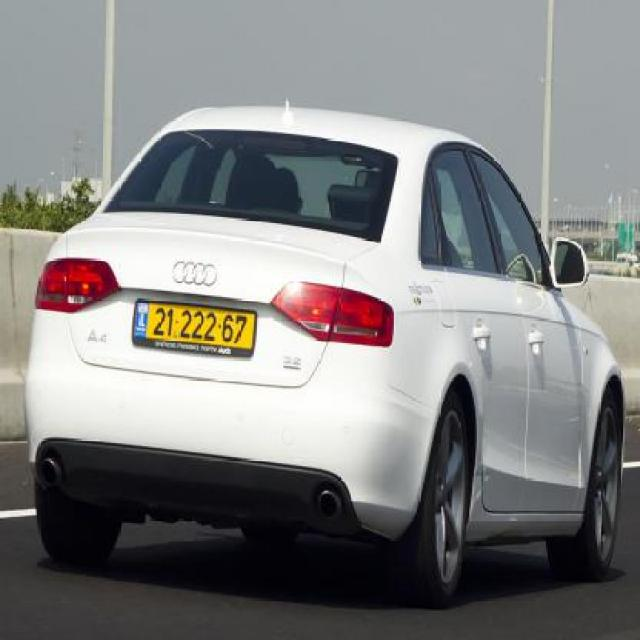


Extracted licence plate:



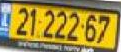

In [65]:
midx = pred['predictions'][0]['x']
midy = pred['predictions'][0]['y']
width = pred['predictions'][0]['width']
height = pred['predictions'][0]['height']

xmin =int(midx - width/2)
xmax = int(midx + width/2)
ymin = int(midy - height/2)
ymax = int(midy + height/2)

import cv2
img = cv2.imread(random_test_image_path)
crop_img = img[ymin:ymax, xmin:xmax]

cv2_imshow(img)
print('\nExtracted licence plate:\n')
cv2_imshow(crop_img)



In [66]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop_img)
print('Licence number: ', result[0][1])

Licence number:  2122267
